In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
bus_routes_df = pd.read_csv('data/RoutesToNeighbourhoods.csv')
census_data = pd.read_csv('data/census_data.csv')

In [28]:
bus_routes_df=bus_routes_df.drop(columns="Unnamed: 0")

In [29]:
bus_routes_df

,Route,Neighborhoods
0,1,"['Roxbury', 'South End']"
1,10,"['South Boston', 'Roxbury', 'South Boston Wate..."
2,104,['Charlestown']
3,105,['Charlestown']
4,109,['Charlestown']
...,...,...
77,8993,['Charlestown']
78,9,"['South Boston', 'Fenway', 'Chinatown', 'South..."
79,91,['Charlestown']
80,92,['Charlestown']


In [30]:
bus_routes_df['Neighborhoods'] = bus_routes_df['Neighborhoods'].apply(lambda x: x.strip("[]").replace("'", "").split(", "))

# Explode the 'Neighborhoods' column
bus_routes_exploded = bus_routes_df.explode('Neighborhoods')

In [31]:
bus_routes_exploded

,Route,Neighborhoods
0,1,Roxbury
0,1,South End
1,10,South Boston
1,10,Roxbury
1,10,South Boston Waterfront
...,...,...
78,9,Roxbury
78,9,Mission Hill
79,91,Charlestown
80,92,Charlestown


In [32]:
census_data.columns

Index(['tract20_nbhd', 'P0020001', 'P0020005', 'P0020006', 'P0020002',
       'P002aapi', 'P002others', 'P0040001', 'P0040005', 'P0040006',
       'P0040002', 'P004aapi', 'P004others', 'P00x0001', 'P00x0005',
       'P00x0006', 'P00x0002', 'P00xaapi', 'P00xothers', 'hhpop', 'P0050001',
       'P0050002', 'P0050003', 'P0050004', 'P0050005', 'P0050006', 'P0050007',
       'P0050008', 'P0050009', 'P0050010', 'H0010001', 'H0010002', 'H0010003',
       'hhsize', 'zipcode'],
      dtype='object')

In [33]:
merged_df = pd.merge(bus_routes_exploded, census_data, left_on='Neighborhoods', right_on='tract20_nbhd')

In [34]:
merged_df.head()

,Route,Neighborhoods,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,...,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize,zipcode
0,1,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
1,10,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
2,14,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
3,15,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119
4,171,Roxbury,Roxbury,54533,7137,22624,16633,3222,4917,43152,...,41,3553,2520,0,1033,21687,20025,1662,2.499525593,02119


In [35]:
merged_df['P0020001'] = pd.to_numeric(merged_df['P0020001'], errors='coerce')
merged_df['P0020005'] = pd.to_numeric(merged_df['P0020005'], errors='coerce')
merged_df['P0020006'] = pd.to_numeric(merged_df['P0020006'], errors='coerce')
merged_df['P0020002'] = pd.to_numeric(merged_df['P0020002'], errors='coerce')
merged_df['P002aapi'] = pd.to_numeric(merged_df['P002aapi'], errors='coerce')


In [36]:
merged_df['P002others'] = pd.to_numeric(merged_df['P002others'], errors='coerce')

In [37]:
# Grouping by 'Route' and summing the numeric values in 'P0020001' column
grouped_data = merged_df.groupby('Route')['P0020001'].sum()

In [38]:
grouped_data.head()

Route
1       85437
10     128933
104     19120
105     19120
109     19120
Name: P0020001, dtype: int64

In [39]:
# Get the top 10 routes with maximum population
top_routes_max_population = grouped_data.nlargest(10)

# Get the top 10 routes with minimum population
top_routes_min_population = grouped_data.nsmallest(10)


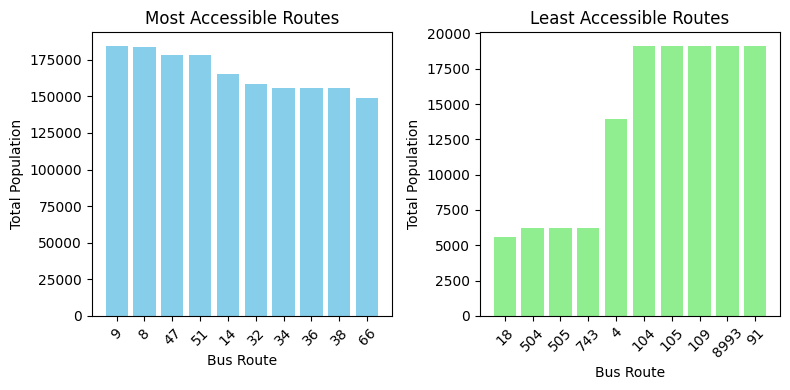

In [40]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

# Plotting top 10 routes with maximum population
axes[0].bar(top_routes_max_population.index, top_routes_max_population.values, color='skyblue')
axes[0].set_title('Most Accessible Routes')
axes[0].set_xlabel('Bus Route')
axes[0].set_ylabel('Total Population')
axes[0].tick_params(axis='x', rotation=45)

# Plotting top 10 routes with minimum population
axes[1].bar(top_routes_min_population.index, top_routes_min_population.values, color='lightgreen')
axes[1].set_title('Least Accessible Routes')
axes[1].set_xlabel('Bus Route')
axes[1].set_ylabel('Total Population')
axes[1].tick_params(axis='x', rotation=45)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [41]:
grouped_data1 = merged_df.groupby('Route').agg({
    'P0020001': 'sum',  # Total population
    'P0020005': 'sum',
    'P0020006': 'sum',
     'P0020002': 'sum',
     'P002aapi': 'sum',
    'P002others' : 'sum'

    # Add other population characteristics you want to analyze
})

In [42]:
new_column_names = {
    'P0020001': 'Total Population',
    'P0020005': 'White alone',
    'P0020006': 'Black or African American alone',
    'P0020002': 'Hispanic or Latino',
    'P002aapi': 'Asian, Native Hawaiian and Pacific Islander alone, all ages',
    'P002others' : 'Other Races'

}

# Rename the columns using the 'rename()' function
grouped_data1.rename(columns=new_column_names, inplace=True)

In [43]:
grouped_data1.columns

Index(['Total Population', 'White alone', 'Black or African American alone',
       'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races'],
      dtype='object')

Index(['Total Population', 'White alone', 'Black or African American alone',
       'Hispanic or Latino',
       'Asian, Native Hawaiian and Pacific Islander alone, all ages',
       'Other Races'],
      dtype='object')


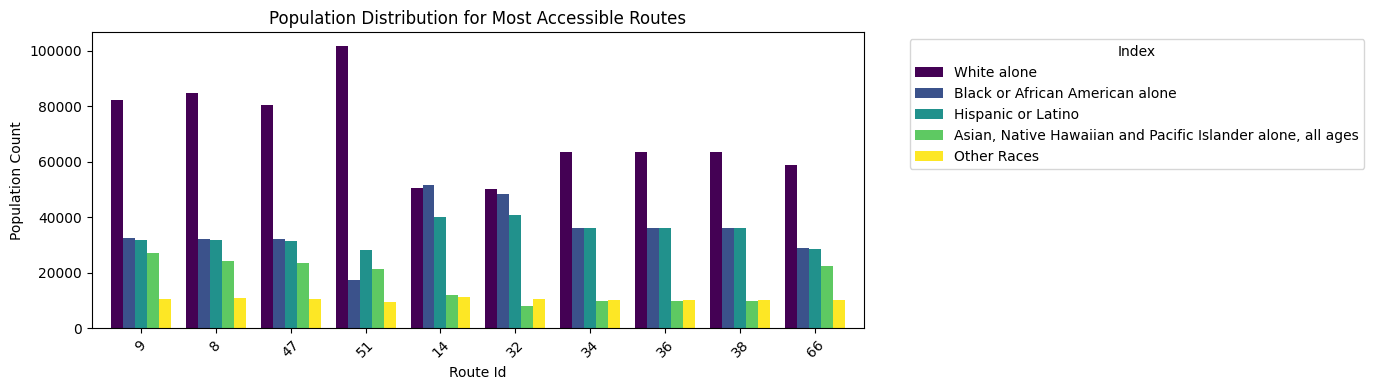

In [44]:
# Get the top 10 routes with maximum total population
top_routes_max_population = grouped_data1['Total Population'].nlargest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data = grouped_data1.loc[top_routes_max_population.index]
print(top_routes_data.columns)
top_routes_data.drop('Total Population', inplace=True, axis=1)
top_routes_data_renamed = top_routes_data
# top_routes_data_renamed.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'})

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Route Id')
plt.ylabel('Population Count')
plt.title('Population Distribution for Most Accessible Routes')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

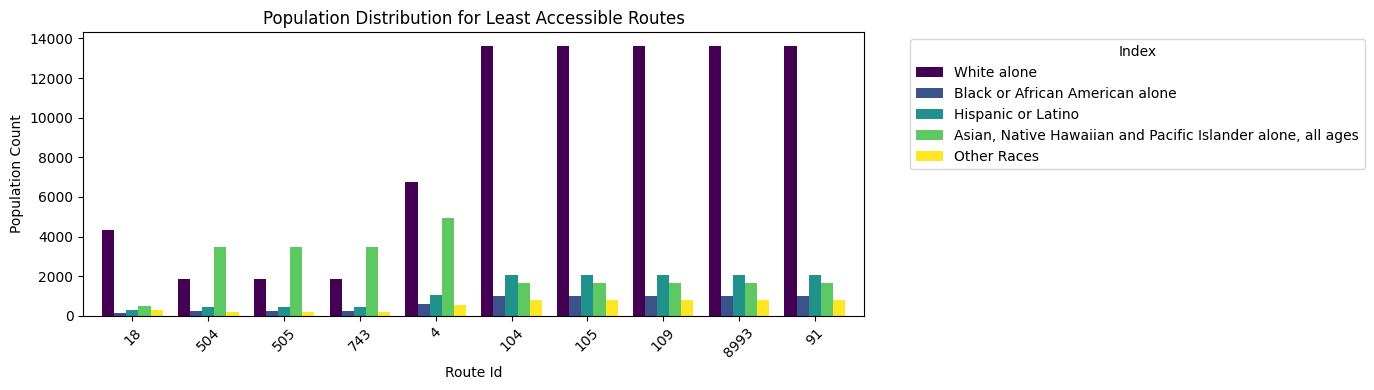

In [45]:
# Get the top 10 routes with maximum total population
top_routes_min_population = grouped_data1['Total Population'].nsmallest(10)

# Extract data for the top 10 routes from the grouped data
top_routes_data1 = grouped_data1.loc[top_routes_min_population.index]
top_routes_data1.drop('Total Population', inplace=True, axis=1)

# Transpose the DataFrame for better plotting (rows become columns)
# top_routes_data = top_routes_data.T

# Plotting grouped bar chart for top 10 routes' population distribution
top_routes_data1.plot(kind='bar', figsize=(14,4), colormap='viridis',width=0.8)
plt.xlabel('Route Id')
plt.ylabel('Population Count')
plt.title('Population Distribution for Least Accessible Routes')
plt.legend(title='Index', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [46]:
# Grouping the data by 'Route' and summing up the ethnic columns for each route
grouped = merged_df.groupby('Route').sum()
grouped

,Neighborhoods,tract20_nbhd,P0020001,P0020005,P0020006,P0020002,P002aapi,P002others,P0040001,P0040005,...,P0050006,P0050007,P0050008,P0050009,P0050010,H0010001,H0010002,H0010003,hhsize,zipcode
Route,,,,,,,,,,,,,,,,,,,,,
1,RoxburySouth End,RoxburySouth End,85437,24499,25883,20631,8097,6327,4315227315,661815908,...,4145,3553743,25200,00,1033743,2168717598,2002516152,16621446,2.4995255931.86354631,0211902118
10,RoxburySouth EndSouth BostonSouth Boston Water...,RoxburySouth EndSouth BostonSouth Boston Water...,128933,57953,27572,24834,10656,7918,4315227315336145286,661815908269304171,...,414500,35537431251,2520000,0000,10337431251,2168717598191404622,2002516152179613624,166214461179998,2.4995255931.863546312.0905294811.539183223,02119021180212702125
104,Charlestown,Charlestown,19120,13626,990,2075,1650,779,15661,11689,...,0,55,0,30,25,9525,8932,593,2.128302732,02129
105,Charlestown,Charlestown,19120,13626,990,2075,1650,779,15661,11689,...,0,55,0,30,25,9525,8932,593,2.128302732,02129
109,Charlestown,Charlestown,19120,13626,990,2075,1650,779,15661,11689,...,0,55,0,30,25,9525,8932,593,2.128302732,02129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8993,Charlestown,Charlestown,19120,13626,990,2075,1650,779,15661,11689,...,0,55,0,30,25,9525,8932,593,2.128302732,02129
9,RoxburySouth EndSouth BostonChinatownMission H...,RoxburySouth EndSouth BostonChinatownMission H...,184576,82467,32426,31875,27179,10629,43152273153361454771559636437,661815908269301741634419950,...,41450000,3553743125446165715169,252000443150214960,000000,10337431253155209,2168717598191403272695514625,2002516152179612937666813273,1662144611793352871352,2.4995255931.863546312.0905294811.96288732.361...,021190211802127021110212002215
91,Charlestown,Charlestown,19120,13626,990,2075,1650,779,15661,11689,...,0,55,0,30,25,9525,8932,593,2.128302732,02129


In [47]:
# Calculating the count of unique neighborhoods for each route
route_neighborhood_count = merged_df.groupby('Route')['Neighborhoods'].nunique()

# Extracting top 5 routes with the largest counts of unique neighborhoods
top_routes = route_neighborhood_count.nlargest(5).index

In [48]:
top_routes_int = [int(route) for route in top_routes]
print(top_routes_int)

[15, 39, 8, 9, 14]


In [49]:
grouped=grouped.drop(columns='P0020001')

TypeError: 'value' must be an instance of str or bytes, not a numpy.int64

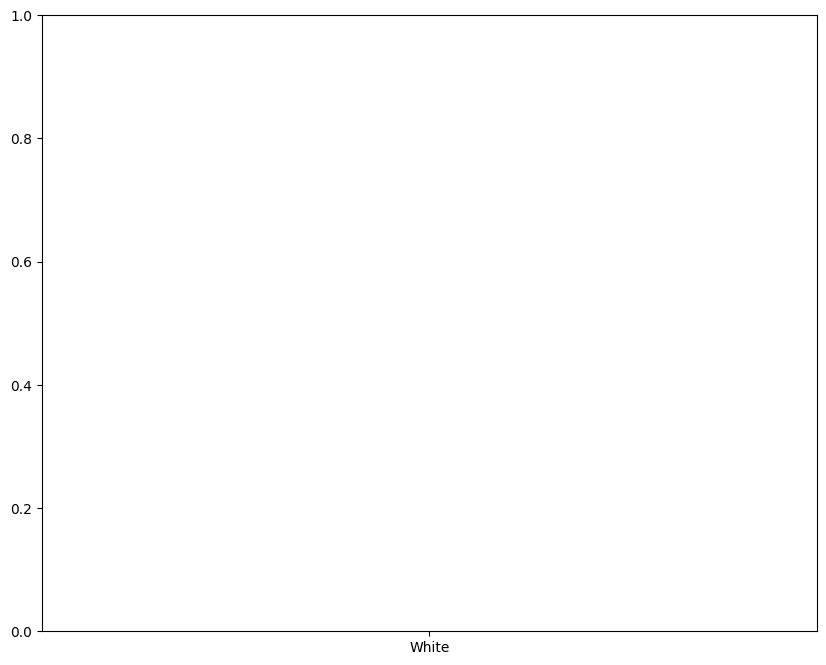

In [50]:
# Selecting ethnic columns for pie chart
ethnic_columns = ['P0020005', 'P0020006', 'P0020002', 'P002aapi','P002others']
ethnic_labels = ['White alone', 'Black or African American alone', 'Hispanic or Latino', 'Asian, Native Hawaiian and Pacific Islander alone, all ages','Other Races']

# Plotting stacked bar chart for ethnic distribution of top routes with max neighborhoods
plt.figure(figsize=(10, 8))
bottom = None
for route in top_routes_int:
    plt.bar(ethnic_labels, grouped.iloc[route], label=f'Route {route}', bottom=bottom,width=0.5)
    if bottom is None:
        bottom = grouped.iloc[route]
    else:
        bottom += grouped.iloc[route]

# Adding legend
plt.legend(title='Routes')
plt.xlabel('Ethnic Groups')
plt.ylabel('Population Count')
plt.title('Ethnic Distribution for Routes Servicing Most Neighborhoods')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()